## Importing the necessary libraries

In [55]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading the data



In [56]:
# Load the data 
titanic_df = pd.read_csv('C:/Users/Deepak/OneDrive/Desktop/CodSoft/Task-01/Titanic-Dataset.csv')

# Display the first few rows of the dataset
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


##  Data Preprocessing

In [57]:
# Drop unnecessary columns
titanic_df = titanic_df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

# Convert 'Sex' to binary
titanic_df['Sex'] = titanic_df['Sex'].replace({'male': 1, 'female': 0})

# Fill missing values in 'Age' with median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Convert 'Embarked' to numeric
titanic_df['Embarked'] = titanic_df['Embarked'].replace({'S': 1, 'C': 2, 'Q': 3})

## Feature Engineering

In [58]:
# Define features and target
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

## Exploratory Data Analysis (EDA)

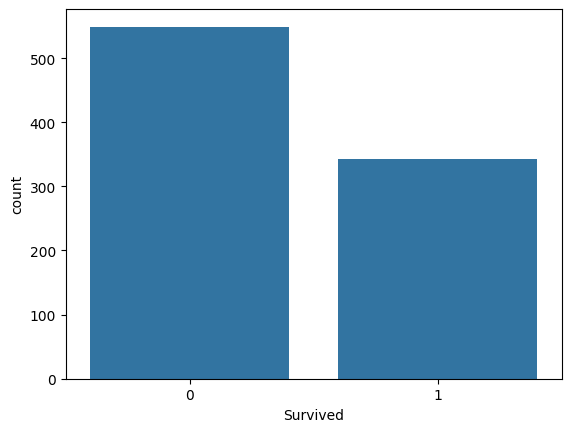

In [59]:
# Visualize survival count
sns.countplot(x='Survived', data=titanic_df)
plt.show()

# Visualize survival count based on gender
# MALE = 0, FEMALE = 1


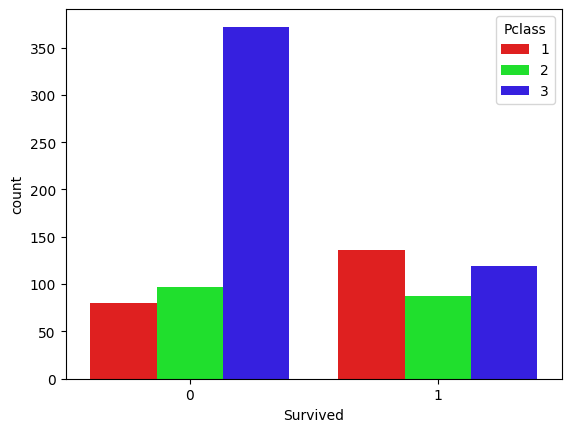

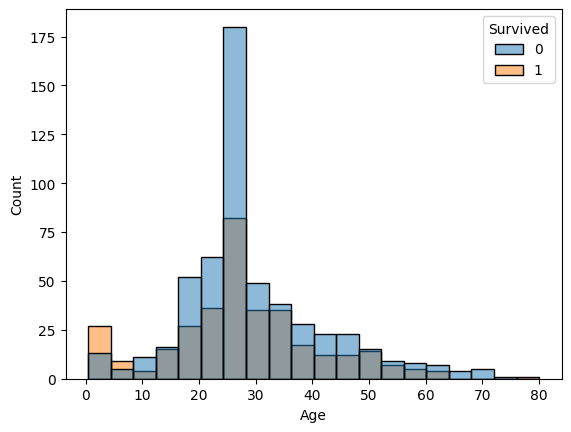

In [60]:
# Visualize survival count based on passenger class
custom_palette = ["#ff0000", "#00ff11", "#1e00ff"] 
sns.countplot(x='Survived', hue='Pclass', data=titanic_df, palette=custom_palette)
plt.show()

# Visualize survival count based on age
sns.histplot(x='Age', hue='Survived', data=titanic_df, bins=20)
plt.show()

In [61]:
# Data scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

 ### Model is Built

In [62]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [63]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [64]:
# Model evaluation
train_accuracy = rf.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

test_accuracy = rf.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9789325842696629
Testing Accuracy: 0.8100558659217877


In [65]:
# Make predictions
y_pred = rf.predict(X_test)


In [66]:
# Create a DataFrame containing information about a single passenger.
data = {'Pclass': [3], 'Sex': [0], 'Age': [36], 'SibSp': [0], 'Parch': [0], 'Fare': [68.5], 'Embarked': [1]}
df = pd.DataFrame(data)

In [67]:
# Predict the movie rating
predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])
if(predicted_rating == 1):
    print("Survived")
elif(predicted_rating == 0):
    print("Not Survived")

Predicted Rating: 1
Survived


c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


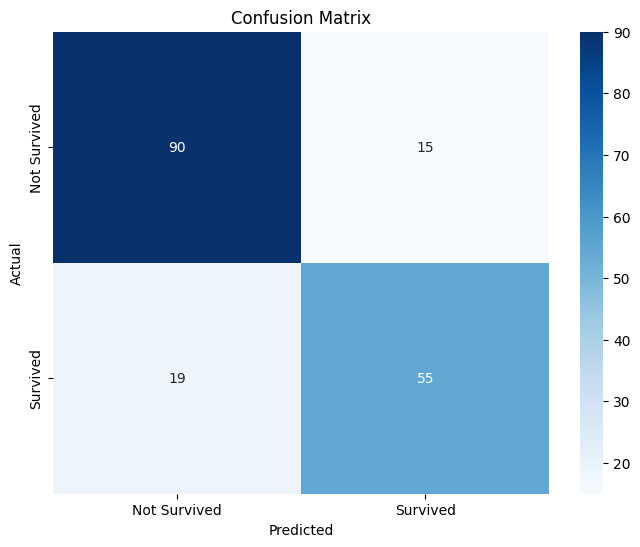

In [68]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [69]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

